In [163]:
import pandas as pd
import matplotlib.pyplot as plt

In [164]:
raw_df = pd.read_csv("../data/RAW/A202001.csv", delimiter=";", nrows=1000000)
head_df = raw_df.head(1000000)
head_df

,FLX_ANN_MOI,ORG_CLE_REG,AGE_BEN_SNDS,BEN_RES_REG,BEN_CMU_TOP,BEN_QLT_COD,BEN_SEX_COD,DDP_SPE_COD,ETE_CAT_SNDS,ETE_REG_COD,...,PSE_ACT_CAT,PSE_SPE_SNDS,PSE_STJ_SNDS,PRE_INS_REG,PSP_ACT_SNDS,PSP_ACT_CAT,PSP_SPE_SNDS,PSP_STJ_SNDS,TOP_PS5_TRG,Unnamed: 55
0,202001,53,70,53,0,1,1,121,9999,99,...,4,0,1,53,19,4,0,1,1,NaN
1,202001,32,70,32,0,1,1,121,9999,99,...,2,0,1,99,0,0,32,2,1,NaN
2,202001,28,80,28,0,1,1,121,9999,99,...,6,0,9,99,0,0,0,9,1,NaN
3,202001,32,80,32,0,2,2,121,9999,99,...,2,0,1,99,0,0,1,2,1,NaN
4,202001,53,60,53,0,1,2,121,9999,99,...,2,0,1,99,0,0,3,2,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,202001,5,50,5,0,1,2,121,9999,99,...,2,0,1,5,0,1,1,1,1,NaN
999996,202001,28,60,28,0,1,1,121,9999,99,...,3,0,1,28,0,1,1,1,1,NaN
999997,202001,32,50,32,0,1,2,121,9999,99,...,3,0,1,44,0,1,1,1,1,NaN
999998,202001,44,70,44,0,1,2,121,9999,99,...,1,15,9,44,0,1,15,9,1,NaN


In [165]:
# Moyenne des dépenses / Professions
new_df = {
    "Depenses" : head_df.FLT_PAI_MNT,
    "SpeExec" : head_df.PSE_SPE_SNDS[(head_df.PSE_SPE_SNDS!=0) & (head_df.PSE_SPE_SNDS!=99) & (head_df.PSE_SPE_SNDS!=80)]
}

new_df = pd.DataFrame(new_df)
new_df = new_df.dropna()
new_df

,Depenses,SpeExec
9,0.00,7.0
14,0.00,32.0
19,0.00,33.0
20,50.00,1.0
21,325.00,1.0
...,...,...
999988,46.00,35.0
999990,65.82,13.0
999993,10.00,12.0
999994,43.00,36.0


In [166]:
depense = new_df.SpeExec.value_counts().sort_values()
depense.sort_values()

34.0      684
36.0     1362
38.0     1430
31.0     1644
35.0     1934
18.0     3820
42.0     4177
37.0     4545
32.0     4593
9.0      4712
12.0     5419
13.0     5843
14.0     6091
8.0      7344
11.0     8994
5.0      9834
33.0     9977
2.0     11645
3.0     11938
7.0     14355
15.0    18070
4.0     21045
6.0     29056
1.0     81406
Name: SpeExec, dtype: int64

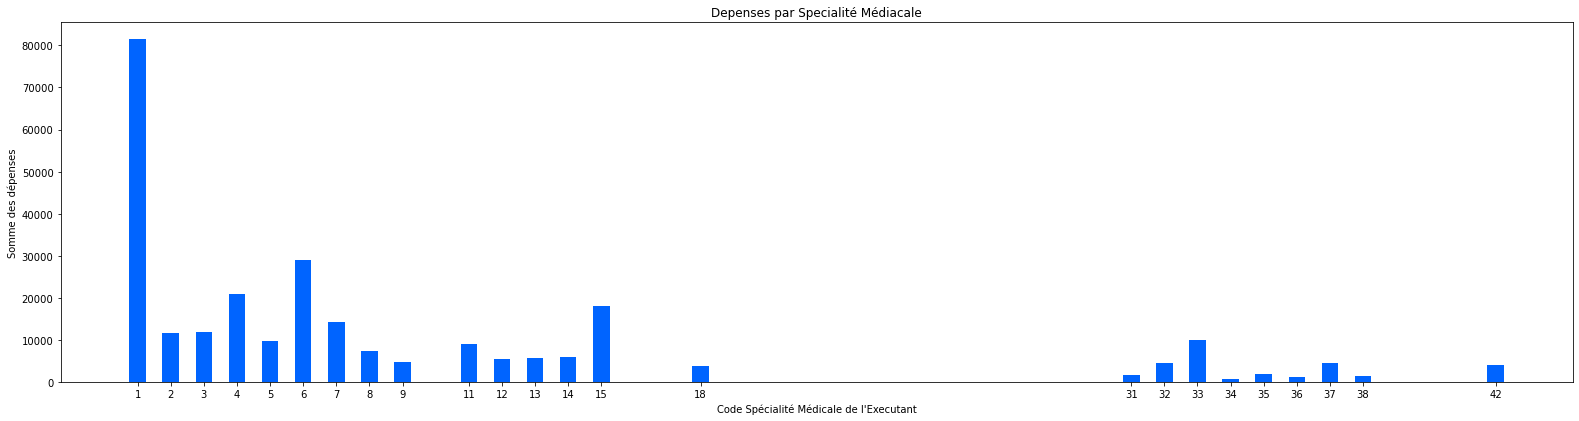

In [167]:
fig = plt.figure(figsize=(21, 5))
ax = fig.add_axes([0,0,1,1])


depenses = ax.bar(depense.keys(), depense, width = 0.5, color = '#0064FF')
ax.set_xlabel("Code Spécialité Médicale de l'Executant")
ax.set_ylabel("Somme des dépenses")

plt.xticks(depense.keys().array)
plt.title("Depenses par Specialité Médiacale")
plt.show()

In [168]:
age_df = {
    "Age" : head_df.AGE_BEN_SNDS[(head_df.AGE_BEN_SNDS != 99)],
    "Sex" : head_df.BEN_SEX_COD[(head_df.BEN_SEX_COD != 0) & (head_df.BEN_SEX_COD != 9)],
    "SpeExec" : head_df.PSE_SPE_SNDS[(head_df.PSE_SPE_SNDS!=0) & (head_df.PSE_SPE_SNDS!=99) & (head_df.PSE_SPE_SNDS!=80)]
}

age_df = pd.DataFrame(age_df)
age_df = age_df.dropna()
age_df

,Age,Sex,SpeExec
9,40.0,2.0,7.0
14,40.0,2.0,32.0
19,30.0,2.0,33.0
20,80.0,2.0,1.0
21,50.0,2.0,1.0
...,...,...,...
999988,60.0,2.0,35.0
999990,0.0,1.0,13.0
999993,30.0,2.0,12.0
999994,0.0,2.0,36.0


In [169]:
occH = age_df.SpeExec.where(age_df.Sex == 1)
occH = occH.dropna()
occH = occH.value_counts()

occF = age_df.SpeExec.where(age_df.Sex == 2)
occF = occF.dropna()
occF = occF.value_counts()

ar = occH.keys().array
ar

<PandasArray>
[ 1.0,  6.0,  4.0, 15.0,  3.0,  2.0,  5.0, 11.0, 33.0,  8.0, 13.0, 12.0, 14.0,
  9.0, 32.0, 18.0, 37.0, 42.0, 35.0, 31.0, 36.0,  7.0, 38.0, 34.0]
Length: 24, dtype: float64

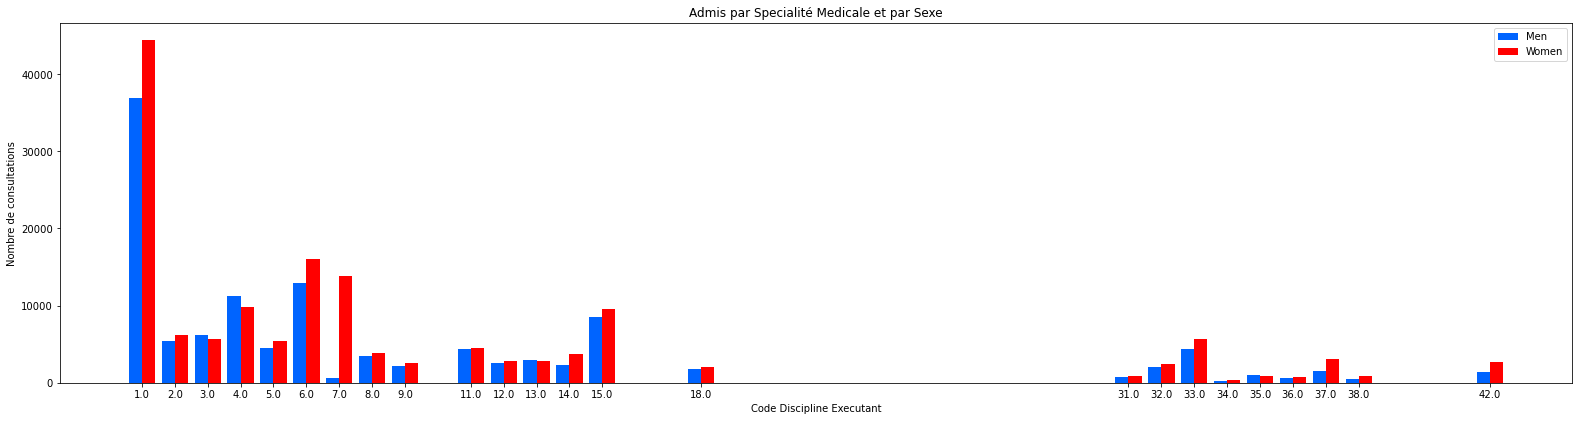

In [170]:
fig = plt.figure(figsize=(21, 5))
ax = fig.add_axes([0,0,1,1])


men = ax.bar(occH.keys()-0.20, occH, width = 0.4, label = "Men", color = '#0064FF')
women = ax.bar(occF.keys()+0.2, occF, width = 0.4, label = "Women", color = '#FF0000')
ax.set_xlabel("Code Discipline Executant")
ax.set_ylabel("Nombre de consultations")
ax.legend()

plt.title("Admis par Specialité Medicale et par Sexe")
plt.xticks(ar, occH.keys())

plt.show()

In [171]:
age_df

,Age,Sex,SpeExec
9,40.0,2.0,7.0
14,40.0,2.0,32.0
19,30.0,2.0,33.0
20,80.0,2.0,1.0
21,50.0,2.0,1.0
...,...,...,...
999988,60.0,2.0,35.0
999990,0.0,1.0,13.0
999993,30.0,2.0,12.0
999994,0.0,2.0,36.0


In [172]:
# Medecine Générale H/F (1)

mgH = age_df.Age.where((age_df.Sex == 1) & (age_df.SpeExec == 1))
mgH = mgH.dropna()
mgH = mgH.value_counts()

mgF = age_df.Age.where((age_df.Sex == 2) & (age_df.SpeExec == 1))
mgF = mgF.dropna()
mgF = mgF.value_counts()

# Radiologie H/F (6)

radioH = age_df.Age.where((age_df.Sex == 1) & (age_df.SpeExec == 6))
radioH = radioH.dropna()
radioH = radioH.value_counts()

radioF = age_df.Age.where((age_df.Sex == 2) & (age_df.SpeExec == 6))
radioF = radioF.dropna()
radioF = radioF.value_counts()

# Chirurgie H/F (4)

chiruH = age_df.Age.where((age_df.Sex == 1) & (age_df.SpeExec == 4))
chiruH = chiruH.dropna()
chiruH = chiruH.value_counts()

chiruF = age_df.Age.where((age_df.Sex == 2) & (age_df.SpeExec == 4))
chiruF = chiruF.dropna()
chiruF = chiruF.value_counts()

# Ophtalmologie H/F (15)

opthtaH = age_df.Age.where((age_df.Sex == 1) & (age_df.SpeExec == 15))
opthtaH = opthtaH.dropna()
opthtaH = opthtaH.value_counts()

opthtaF = age_df.Age.where((age_df.Sex == 2) & (age_df.SpeExec == 15))
opthtaF = opthtaF.dropna()
opthtaF = opthtaF.value_counts()

# Gynecologie F (7)

gyneco = age_df.Age.where((age_df.Sex == 2) & (age_df.SpeExec == 7))
gyneco = gyneco.dropna()
gyneco = gyneco.value_counts()

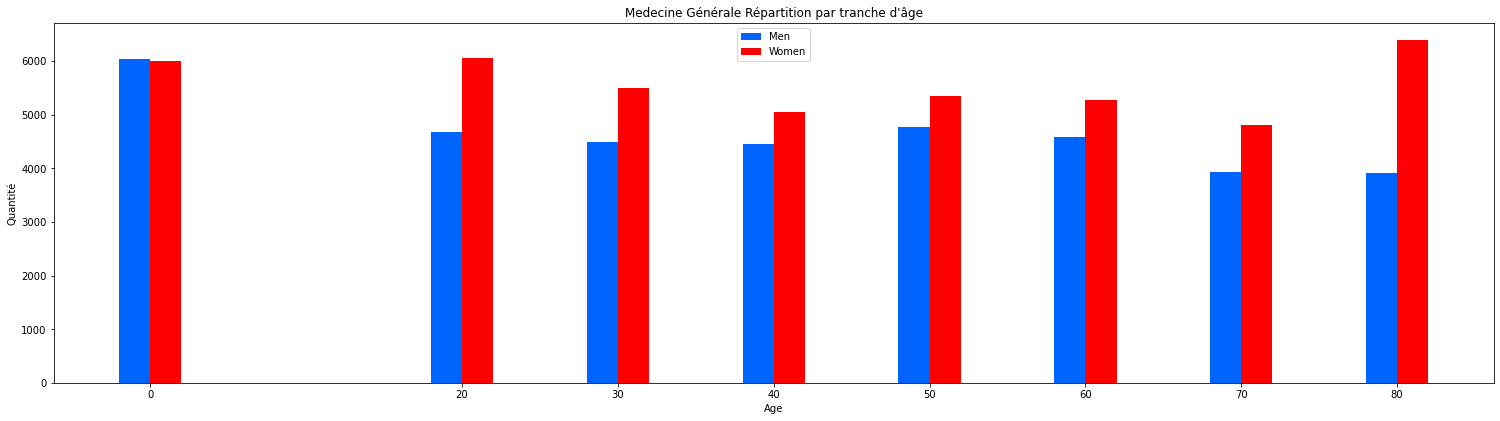

In [173]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_axes([0,0,1,1])

men = ax.bar(mgH.keys()-1, mgH, width = 2, label = "Men", color = '#0064FF')
women = ax.bar(mgF.keys()+1, mgF, width = 2, label = "Women", color = '#FF0000')
ax.set_xlabel("Age")
ax.set_ylabel("Quantité")
ax.legend()

plt.xticks(mgH.keys().array)
plt.title("Medecine Générale Répartition par tranche d'âge")
plt.show()

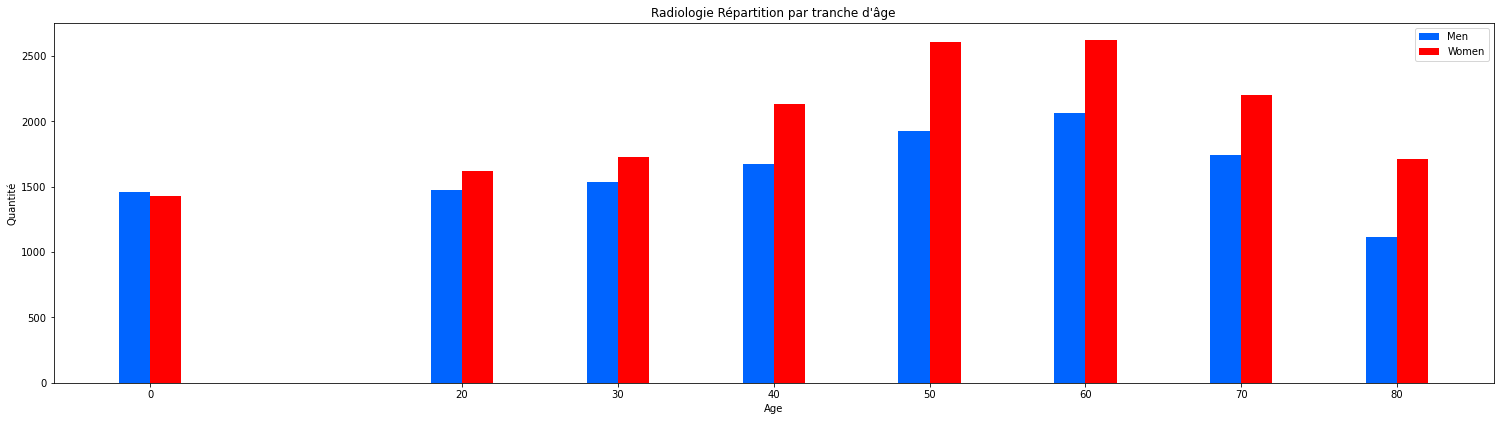

In [174]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_axes([0,0,1,1])

men = ax.bar(radioH.keys()-1, radioH, width = 2, label = "Men", color = '#0064FF')
women = ax.bar(radioF.keys()+1, radioF, width = 2, label = "Women", color = '#FF0000')
ax.set_xlabel("Age")
ax.set_ylabel("Quantité")
ax.legend()

plt.xticks(chiruH.keys().array)
plt.title("Radiologie Répartition par tranche d'âge")
plt.show()

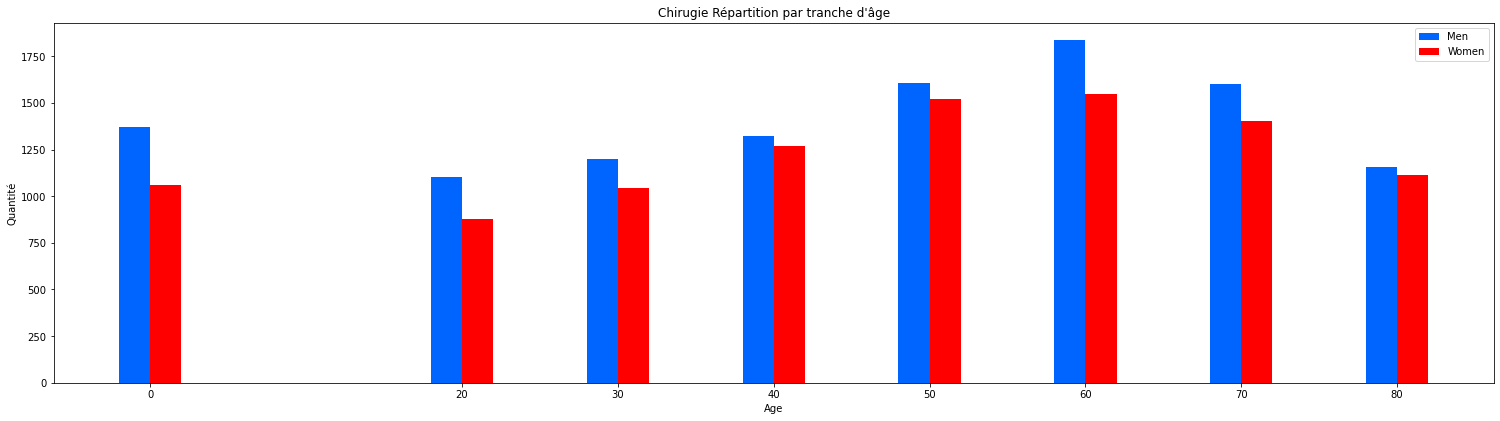

In [175]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_axes([0,0,1,1])

men = ax.bar(chiruH.keys()-1, chiruH, width = 2, label = "Men", color = '#0064FF')
women = ax.bar(chiruF.keys()+1, chiruF, width = 2, label = "Women", color = '#FF0000')
ax.set_xlabel("Age")
ax.set_ylabel("Quantité")
ax.legend()

plt.xticks(chiruH.keys().array)
plt.title("Chirugie Répartition par tranche d'âge")
plt.show()

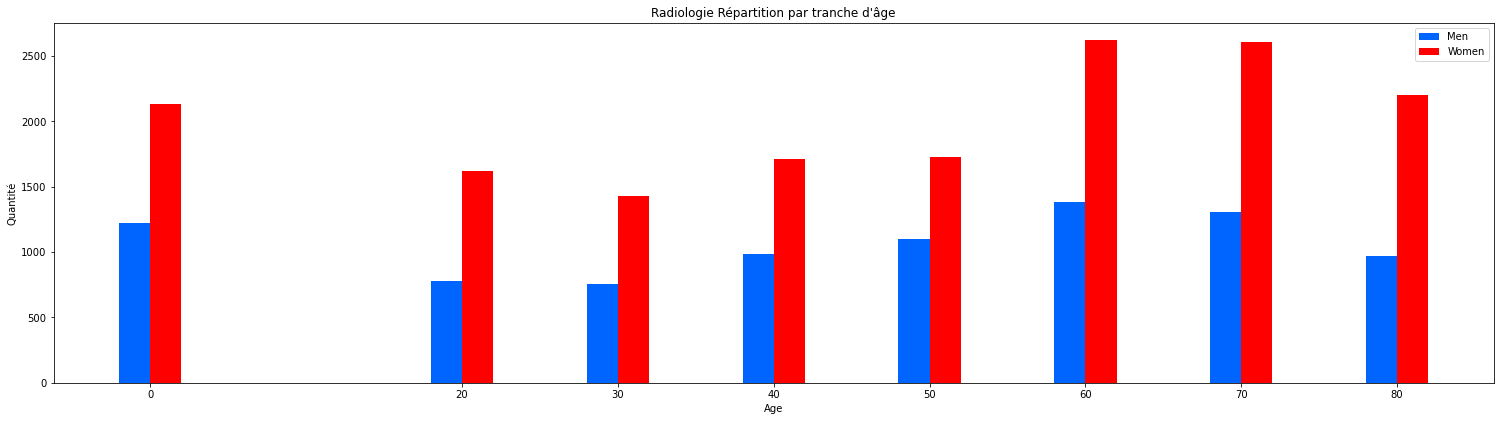

In [176]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_axes([0,0,1,1])

men = ax.bar(opthtaH.keys()-1, opthtaH, width = 2, label = "Men", color = '#0064FF')
women = ax.bar(opthtaF.keys()+1, radioF, width = 2, label = "Women", color = '#FF0000')
ax.set_xlabel("Age")
ax.set_ylabel("Quantité")
ax.legend()

plt.xticks(opthtaH.keys().array)
plt.title("Radiologie Répartition par tranche d'âge")
plt.show()

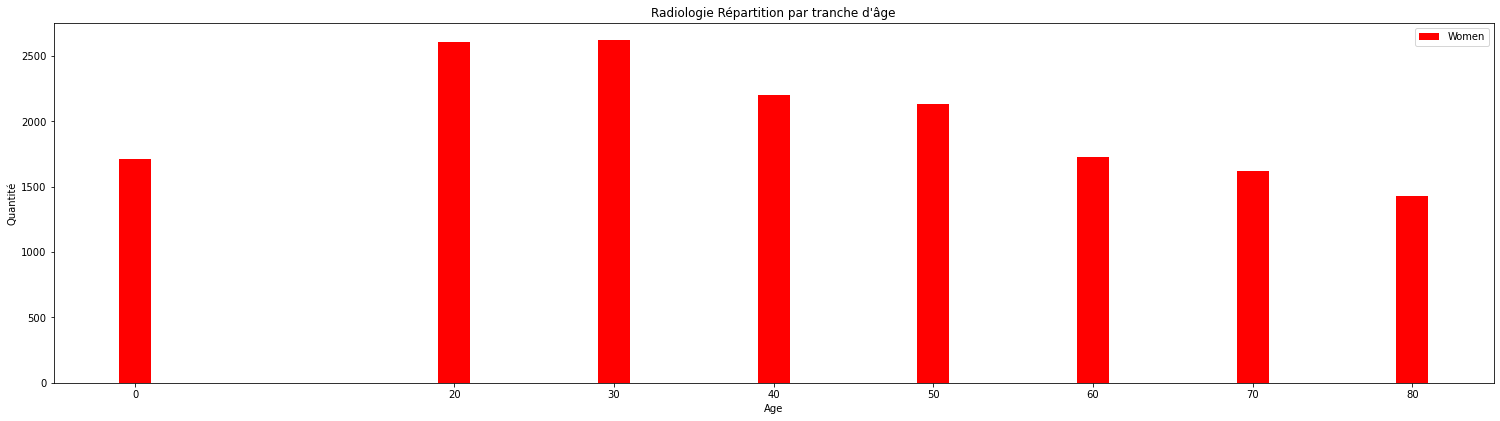

In [177]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_axes([0,0,1,1])

women = ax.bar(gyneco.keys(), radioF, width = 2, label = "Women", color = '#FF0000')
ax.set_xlabel("Age")
ax.set_ylabel("Quantité")
ax.legend()

plt.xticks(gyneco.keys().array)
plt.title("Radiologie Répartition par tranche d'âge")
plt.show()